# Example: Estimate the Probability of Profit (POP) for a Put Option Contract
In this example, we'll anlyze the behavior and propreties of a cash secrured put option, which behaves like a naked short put option position in combination with a cash position equal to the strike price of the put option contract.

> __Learning Objectives:__
> 
> By the end of this example, you should be able to:
> Three learning objectives go here

Let's get started!
___

## Setup, Data, and Prerequisites
First, we set up the computational environment by including the `Include.jl` file and loading any needed resources.

> __Include:__ The [`include(...)` command](https://docs.julialang.org/en/v1/base/base/#include) evaluates the contents of the input source file, `Include.jl`, in the notebook's global scope. The `Include.jl` file sets paths, loads required external packages, etc. For additional information on functions and types used in this material, see the [Julia programming language documentation](https://docs.julialang.org/en/v1/). 

Let's set up our code environment:

In [1]:
include(joinpath(@__DIR__, "Include.jl")); # include the Include.jl file

For additional information on functions and types used in this material, see the [Julia programming language documentation](https://docs.julialang.org/en/v1/) and the [VLQuantitativeFinancePackage.jl documentation](https://github.com/varnerlab/VLQuantitativeFinancePackage.jl).

### Data
To start, load the options data using [the `MyOptionsChainDataSet(...)` function](https://varnerlab.github.io/VLQuantitativeFinancePackage.jl/dev/data/#VLQuantitativeFinancePackage.MyOptionsChainDataSet) and store the metadata in the `metadata::Dict{String,Any}` variable and the options chain data in the `optionschain::DataFrame` variable.

In [2]:
metadata, optionschain, ticker = let
    
    # initialize -
    ticker = "amd";
    options_dataset = MyOptionsChainDataSet(ticker = ticker);
    metadata = options_dataset.metadata;
    optionschain = options_dataset.data;

    (metadata, optionschain, ticker) # return
end;

What's in the `metadata::Dict{String,Any}` dictionary? 

In [3]:
let

    # initialize -
    df = DataFrame();
    fields = metadata |> keys |> collect |> sort;

    for i ∈ eachindex(fields)
        field = fields[i];
        row_df = (
            field = field |> String,
            value = metadata[field] |> string,
        );
        push!(df, row_df);
    end

    # make a table -
    pretty_table(
         df;
         fit_table_in_display_horizontally = false,
         backend = :text,
         table_format = TextTableFormat(borders = text_table_borders__compact)
    );

end

 ---------------------------- --------------
                       field          value 
                      String         String 
 ---------------------------- --------------
                         DTE             58
                      atm_IV         0.5903
             expiration_date     2025-12-19
       historical_volatility         0.7971
                   is_weekly          false
               purchase_date     2025-10-22
                      source   barchart.com
  underlying_share_price_ask         225.91
  underlying_share_price_bid         225.74
  underlying_share_price_mid         225.78
 ---------------------------- --------------


What about the `optionschain::DataFrame` variable?

In [4]:
optionschain

Row,Strike,Moneyness,Bid,Mid,Ask,Last,Volume,Open Int,IV,Delta,Type
,Float64,Float64,Float64,Float64,Float64,Float64,String7,String7,Float64,Float64,String7
1,25.0,0.8907,203.1,204.0,204.9,209.72,0,419,2.1122,0.9989,Call
2,30.0,0.8688,198.2,199.05,199.9,206.3,0,163,1.9784,0.9985,Call
3,35.0,0.847,193.2,193.98,194.75,199.75,0,17,0.0,0.0,Call
4,40.0,0.8251,188.3,189.1,189.9,176.24,0,18,1.6654,0.9985,Call
5,45.0,0.8033,183.25,184.13,185.0,174.11,0,318,1.5375,0.9985,Call
6,50.0,0.7814,178.4,179.1,179.8,167.46,0,691,1.2356,0.9996,Call
7,55.0,0.7596,173.35,174.13,174.9,177.43,0,176,1.0885,0.9998,Call
8,60.0,0.7377,168.5,169.3,170.1,162.15,0,332,1.3802,0.9967,Call
9,65.0,0.7158,163.45,164.33,165.2,175.38,0,180,1.2927,0.9967,Call


In [5]:
let
        
        # initialize -
        δ = 0.5; # set the delta for ATM search
        options_chain = optionschain;
        Sₒ = metadata["underlying_share_price_mid"] |> x-> parse(Float64, x) # mid underlying price on purchase date, 10-22-2025

        # Next, let's find contracts that are at-the-money (ATM) or near-the-money (NTM) -
        atm_call_options = filter(row -> abs((row[:Strike] - Sₒ)/Sₒ) < δ, options_chain);
end

Row,Strike,Moneyness,Bid,Mid,Ask,Last,Volume,Open Int,IV,Delta,Type
,Float64,Float64,Float64,Float64,Float64,Float64,String7,String7,Float64,Float64,String7
1,115.0,0.4972,114.4,114.98,115.55,121.33,0,"3,187",0.8688,0.9853,Call
2,120.0,0.4754,109.65,110.1,110.55,109.75,1,"5,468",0.7294,0.9915,Call
3,125.0,0.4535,104.65,105.2,105.75,105.85,10,"5,090",0.8135,0.9796,Call
4,130.0,0.4317,99.9,100.35,100.8,98.6,2,"3,540",0.7909,0.9756,Call
5,135.0,0.4098,95.25,95.65,96.05,96.69,4,"3,604",0.7897,0.9681,Call
6,140.0,0.388,90.25,90.7,91.15,92.35,46,"4,005",0.7459,0.9658,Call
7,145.0,0.3661,85.45,85.93,86.4,85.15,33,"2,295",0.7261,0.9593,Call
8,150.0,0.3442,80.75,81.23,81.7,79.6,92,"6,619",0.7115,0.9508,Call
9,155.0,0.3224,76.2,76.55,76.9,77.8,3,"4,606",0.6951,0.9415,Call


### Constants
Let's set a value for the step size `Δt::Float64`, i.e., `1 day` in units of years (assuming a `365-day` year), and the risk-free rate at the time we gathered the data for the option contracts; we approximate this value using the [yield on the 10-year Treasury Note](https://ycharts.com/indicators/10_year_treasury_rate). We also set a value for the underlying share price `Sₒ::Float64`, the number of levels in the binomial tree model `h::Int64`, the strike price `K::Float64`, and the direction parameter `θ::Int64`; we assume 6 levels per day.

In [6]:
Sₒ = metadata["underlying_share_price_mid"] |> x-> parse(Float64, x); # mid underlying price on purchase date, 10-22-2025

Other constants:

In [7]:
Δt = (1/365); # options use 365 day year
DTE = metadata["DTE"] |> x-> parse(Float64, x); # days to expiration
risk_free_rate = 0.0431; # yield 10-year treasury note on 13-Jun-2024
h = 8*DTE |> x-> floor(Int, x); # 8-points per day
w = 0.3; # width parameter
θ = -1; # long/short indicator: -1 = short, +1 = long

___

## Task 1: Select a random put option from the dataset
In this task, we'll select put option contracts such that $\left(1-w\right)\cdot{S}_{\circ}\leq{K}<S_{\circ}$ where $w>0$, and we hold a long cash position equal to the strike price of the put option contract. 

Let's begin by filtering the contracts in the `optionschain::DataFrame` to include only `put` contracts that obey the strike price constraint. 
We'll use the [filter function](https://dataframes.juliadata.org/stable/lib/functions/#Base.filter) exported by the [DataFrames.jl package](https://github.com/JuliaData/DataFrames.jl) in combination with the [Julia pipe operator](https://docs.julialang.org/en/v1/manual/functions/#Function-composition-and-piping). Save the filtered selection of put contracts in the `put_contracts::DataFrame` variable:

In [8]:
put_contracts = filter(:Type=>x->x == "Put", optionschain) |> y -> filter(:Strike=> x-> (x < Sₒ && x ≥ (1-w)*Sₒ), y)

Row,Strike,Moneyness,Bid,Mid,Ask,Last,Volume,Open Int,IV,Delta,Type
,Float64,Float64,Float64,Float64,Float64,Float64,String7,String7,Float64,Float64,String7
1,160.0,-0.3005,1.97,1.99,2.01,2.04,200,"4,264",0.6674,-0.0669,Put
2,165.0,-0.2787,2.4,2.42,2.44,2.34,128,"2,901",0.6553,-0.0801,Put
3,170.0,-0.2568,2.92,2.95,2.97,3.1,90,"2,864",0.6447,-0.0956,Put
4,175.0,-0.2349,3.55,3.6,3.65,3.75,27,"2,572",0.6366,-0.114,Put
5,180.0,-0.2131,4.3,4.35,4.4,4.5,164,"10,797",0.628,-0.1343,Put
6,185.0,-0.1912,5.2,5.25,5.3,5.25,112,"1,744",0.6211,-0.1575,Put
7,190.0,-0.1694,6.2,6.28,6.35,6.35,235,"2,770",0.6171,-0.1838,Put
8,195.0,-0.1475,7.4,7.48,7.55,7.58,643,"6,688",0.6082,-0.2109,Put
9,200.0,-0.1256,8.8,8.88,8.95,8.88,"1,714","8,163",0.6041,-0.2415,Put


Select a random contract from the `put_contracts::DataFrame` collection; this will be our put leg of the cash-secured put. Save the data for this contract in the `put_leg_data` variable, which is type [DataFrameRow](https://dataframes.juliadata.org/stable/lib/types/#DataFrames.DataFrameRow):

In [9]:
put_leg_data = nrow(put_contracts) |> i-> put_contracts[rand(1:i),:] # fancy!

Row,Strike,Moneyness,Bid,Mid,Ask,Last,Volume,Open Int,IV,Delta,Type
,Float64,Float64,Float64,Float64,Float64,Float64,String7,String7,Float64,Float64,String7
9,200.0,-0.1256,8.8,8.88,8.95,8.88,"1,714","8,163",0.6041,-0.2415,Put


Next, build a [`MyAmericanPutContractModel` instance](https://varnerlab.github.io/VLQuantitativeFinancePackage.jl/dev/derivatives/#VLQuantitativeFinancePackage.MyAmericanPutContractModel) using the `put` contract data and store this contract model in the `put_contract_model::MyAmericanPutContractModel` variable. 

To access data from the `DataFrameRow`, pass in the column name. For example, to get the strike price, you would say: `put_leg_data[:Strike]`. For the premium value, use the midpoint value.

In [10]:
put_contract_model = build(MyAmericanPutContractModel, (
    K = put_leg_data[:Strike], 
    premium = put_leg_data[:Mid], # mark price
    IV = put_leg_data[:IV], # implied volatility in percentage
    DTE = (DTE)*Δt,
    sense = θ, # compute greeks of long contract
    copy = 1,
)); 

___

## Task 2: Compute the break-even points for short put contract
In this task, let's begin by computing the breakeven of the `put` contract we constructed above. The payoff per share at expiration for a `put` option contract is given by:
$$
\begin{align*}
V_{p}(K,S(T)) = \max\left(K - S(T),~0\right)
\end{align*}
$$
where $K$ denotes the strike price and $S(T)$ is the share price at expiration. The `seller` charges the `buyer` a premium $\mathcal{P}_{p}(K, S(0))$ for each contract. Because we sold this contract, we are in a short position. For the general case, the profit for a put contract is given by:
$$
\begin{equation*}
P_{p}(K,S(T)) = \theta\cdot\left({V_{p}}(K,S(T)) - \mathcal{P}_{p}(K,S(0))\right)
\end{equation*}
$$
where $\theta$ is a direction parameter; $\theta = 1$ if we are `long` the contract, while $\theta = -1$ if we are `short` the contract. The breakeven at expiration for both a long or short put contract is the share price $B_{p}(T)$ at expiration such that $P_{c}(K, B_{p}(T)) = 0$. Thus, for our short `AMD` put, the breakeven share price $B_{p}(T)$ USD/share would be:
$$
\begin{equation*}
B_{p} = K - \mathcal{P}_{p}(K,S(0))
\end{equation*}
$$
For the buyer to make money, the share price must fall below the breakeven price $B_{p}$. For the seller to make money, the share price must remain above the breakeven price. Compute the break-even price for the `put` contract and store this in the `computed_breakeven_price` variable:

In [49]:
computed_breakeven_price = put_contract_model.K - put_contract_model.premium;

### Visualize
Now that we have analytically computed the maximum profit, maximum loss, and breakeven values, let's visualize the profit diagram at expiration for the covered call. To do this, build an array of share prices at expiration and save this in the `share_price_array::Array{Float64,1}` variable. 

We'll look at a range around the share acquisition price $(1-w) \cdot B_{p}$ and $\left(2-w\right) \cdot K$, where $w$ is a width parameter $0<w<1$ that we specify.

In [39]:
share_price_array = let

    w = 0.95; # width of range to explore. Adjust me to see what happens
    number_of_steps = 1001; # leave me alone!
    K = put_contract_model.K; # strike price
    Bₚ = breakeven_price; # breakeven price 

    # build a range, then pass that to collect (which gives an array)
    share_price_array = range((w)*Bₚ, stop = (2-w)*Sₒ, length = number_of_steps) |> collect;

    # return the data
    share_price_array;
end;

In [40]:
share_price_array

1001-element Vector{Float64}:
 181.564
 181.619505
 181.67501
 181.730515
 181.78601999999998
 181.841525
 181.89703
 181.95253499999998
 182.00804
 182.063545
   ⋮
 236.62496000000002
 236.68046500000003
 236.73597
 236.79147500000002
 236.84698000000003
 236.902485
 236.95799000000002
 237.013495
 237.06900000000002

Finally, compute the profit for the short put. We compute the profit by [calling the `profit(...)` function](https://varnerlab.github.io/VLQuantitativeFinancePackage.jl/dev/derivatives/#VLQuantitativeFinancePackage.profit) and save the profit values in the `profit_array` variable. The [`profit(...)` function](https://varnerlab.github.io/VLQuantitativeFinancePackage.jl/dev/derivatives/#VLQuantitativeFinancePackage.profit) takes two arguments, the contract models as an array and the share price array.

The `profit_array` will be a `1001`$\times$ `4` array, in which each row is a possible value for the share price at expiration $S_{T}$. Column `1` holds the possible $S(T)$ values, column `2` holds the profit for the short put, column `3` holds the profit for the shares, and column `4` holds the overall profit for the composite trade.

In [41]:
profit_array = profit([put_contract_model], share_price_array)

1001×3 Matrix{Float64}:
 181.564  -9.556    -9.556
 181.62   -9.50049  -9.50049
 181.675  -9.44499  -9.44499
 181.731  -9.38949  -9.38949
 181.786  -9.33398  -9.33398
 181.842  -9.27848  -9.27848
 181.897  -9.22297  -9.22297
 181.953  -9.16747  -9.16747
 182.008  -9.11196  -9.11196
 182.064  -9.05645  -9.05645
   ⋮                
 236.625   8.88      8.88
 236.68    8.88      8.88
 236.736   8.88      8.88
 236.791   8.88      8.88
 236.847   8.88      8.88
 236.902   8.88      8.88
 236.958   8.88      8.88
 237.013   8.88      8.88
 237.069   8.88      8.88

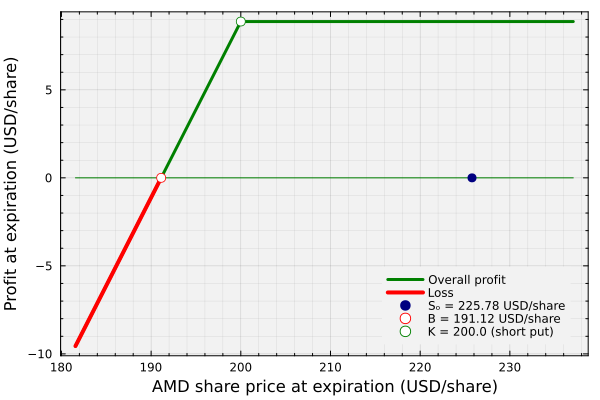

In [ ]:
let
    # initialize 
    N = length(profit_array[:,1]); # how many steps do we have?
    BEL = zeros(N);
    K = put_contract_model.K;

    # SPL_vertical = range(-100,stop=100,length=N) |> collect;
    SPL_horizontal = Sₒ*ones(N);
    STRIKE_horizontal = K;
    max_profit = (put_contract_model.premium);
    B = computed_breakeven_price;

    # setup the coloring -
    profit_idx = findall(>(0), profit_array[:,end])
    # alternative_loss_index = findall(x->x ≥ max_profit_intersection, profit_array[:,end]);
    loss_array = profit_array[:,:]; loss_array[profit_idx,:] .= NaN
    
    plot(profit_array[:,1],profit_array[:,end], lw=3, c=:green, label="Overall profit", 
        bg="gray95", background_color_outside="white", framestyle = :box, fg_legend = :transparent, legendfontsize=8, legend=:bottomright,
        xminorticks=5, yminorticks=5, minorgrid=true);
    plot!(profit_array[:,1], BEL, c=:green, lw=1, label="")
    plot!(loss_array[:,1], loss_array[:,3], lw=4, label="Loss", c=:red)
    scatter!([Sₒ], [0], ms=5, c=:navy, msc=:navy, ls=:dash, label="Sₒ = $(Sₒ) USD/share")
    scatter!([B], [0], ms=5, c=:white, msc=:red, ls=:dash, label="B = $(B) USD/share")
    scatter!([K],[max_profit], ms=5, label = "K = $(K) (short put)", msc=:green, c=:white)
    
    xlabel!("AMD share price at expiration (USD/share)", fontsize=18)
    ylabel!("Profit at expiration (USD/share)", fontsize=18)
end

___

## Task 3: Probability of Outcomes
In this task, we estimate the probability of certain outcomes for the cash-secured put position at expiration. e'll consider three scenarios:

> __Scenarios:__
>
> * __Scenario 1: Downside loss__. In this scenario, the share price at expiration $S(T)$ is at least $\epsilon$ _below_ the downside breakeven point $B$, assuming $\epsilon \geq$ `0.01` USD/share. The probability of this scenario occurring is given by $P(S(T)\leq{B} - \epsilon) = F_{S}\left(B - \epsilon\right)$.
> * __Scenario 2: Maximum profit__. In this scenario, the share price at expiration $S(T)$ exceeds the strike price $K$. The probability of this scenario occurring is given by $P(S(T) > K) = 1 - F_{S}\left(K\right)$.
> * __Scenario 3: Exercise__. In this scenario, the share price at expiration $S(T)$ is less than or equal to the strike price $K$. The probability of this scenario occurring is given by $P(S(T) \leq K - \epsilon) = F_{S}\left(K - \epsilon\right)$, where $\epsilon \geq$ `0.01` USD/share.


To start, let's build a model of the future underlying share price at expiration $S(T)$. Build an instance of the [MyGeometricBrownianMotionEquityModel type](https://varnerlab.github.io/VLQuantitativeFinancePackage.jl/dev/equity/#VLQuantitativeFinancePackage.MyGeometricBrownianMotionEquityModel) which holds values for the drift `μ` and volatility `σ` parameters using a [custom build(...) method](https://varnerlab.github.io/VLQuantitativeFinancePackage.jl/dev/equity/#VLQuantitativeFinancePackage.build-Tuple{Type{MyGeometricBrownianMotionEquityModel},%20NamedTuple}). 

> __Risk-neutral pricing__: We set the drift parameter to the risk-free rate $\mu = \bar{r}$ (because options use a risk-neutral probability measure), and the volatility is set to the implied volatility estimate $\sigma = \text{IV}$ from the options chain data. This gives us the risk-neutral simulation of the underlying share price at expiration.

We'll save the model in the `model::MyGeometricBrownianMotionEquityModel` variable, and the implied volatility value in the `σ̄::Float64` variable.

In [ ]:
model, σ̄ = let

    # Step 1: get the implied volatility 
    σ̄ = put_leg_data[:IV];

    # Step 2: build the GBM model
    model = build(MyGeometricBrownianMotionEquityModel, (
        μ = risk_free_rate,
        σ = σ̄
    ));

    model, σ̄
end;

Now that we have a populated [MyGeometricBrownianMotionEquityModel instance](https://varnerlab.github.io/VLQuantitativeFinancePackage.jl/dev/equity/#VLQuantitativeFinancePackage.MyGeometricBrownianMotionEquityModel) holding the `AMD` data, let's generate `number_of_samples` possible future share price values using the [sample(...) function exported by the VLQuantitativeFinancePackage.jl package](https://varnerlab.github.io/VLQuantitativeFinancePackage.jl/dev/equity/#VLQuantitativeFinancePackage.sample-Tuple{MyMultipleAssetGeometricBrownianMotionEquityModel,%20NamedTuple}).
* The [sample method](https://varnerlab.github.io/VLQuantitativeFinancePackage.jl/dev/equity/#VLQuantitativeFinancePackage.sample-Tuple{MyMultipleAssetGeometricBrownianMotionEquityModel,%20NamedTuple}) takes a `model::MyGeometricBrownianMotionEquityModel` instance as the first argument, along with the time values that we wish to sample: `T₁::Float64` is the start time, `T₂::Float64` is the stop time (in units of `years`), `Δt::Float64` is the time step (in units of `years`), and `Sₒ::Float64` denotes the initial share price (in units of `USD/share`). Finally, we pass in the number of samples we want to generate in the `number_of_paths` argument.
* The [sample method](https://varnerlab.github.io/VLQuantitativeFinancePackage.jl/dev/equity/#VLQuantitativeFinancePackage.sample-Tuple{MyMultipleAssetGeometricBrownianMotionEquityModel,%20NamedTuple}) generates `number_of_paths` sample paths from $T_{1}\rightarrow{T}_{2}$ in steps of $\Delta{t}$. However, we only want the share prices corresponding to the duration of the contract, i.e., $T_{2} = \text{DTE}$. Thus, we pass the full `samples` array [using the Julia pipe operator](https://docs.julialang.org/en/v1/manual/functions/#Function-composition-and-piping) to a slicing operation where we select columns `2:end` of the last row (col 1 holds the time). We store the `number_of_paths` samples of the share price at $T_{2}$ in the `endpoint_samples::Array{Float64,1}` variable.

So what do we get?

In [ ]:
endpoint = let
    number_of_samples = 25000; # TODO: adjust me!
    endpoint = VLQuantitativeFinancePackage.sample(model, (
        T₁ = 0.0,
        T₂ = (DTE)*(Δt),
        Δt = Δt,
        Sₒ = Sₒ
    ), number_of_paths = number_of_samples) |> samples -> samples[end,2:end]; # get last row from col 2 -> number_of_paths

    endpoint;
end;

We've previously shown that sampling a GBM model emits a LogNormal share price distribution. Fit a [LogNormal distribution exported by the Distributions.jl package](https://juliastats.org/Distributions.jl/stable/univariate/#Distributions.LogNormal) using the [fit_mle(...) function exported by Distributions.jl](https://juliastats.org/Distributions.jl/stable/fit/#Distributions.fit_mle-Tuple{Any,%20Any}), and save this in the `d_gbm` variable.

In [ ]:
d_gbm = fit_mle(LogNormal, endpoint);

### Cumulative distribution
Next, estimate [the cumulative distribution function (CDF)](https://en.wikipedia.org/wiki/Cumulative_distribution_function) for the geometric Brownian motion share price distribution. 
We can query the cumulative distribution function $F_{S}(\star)$ for the projected geometric Brownian motion distribution `d_gbm` using [the `cdf(...)` function exported by the Distributions.jl package](https://github.com/JuliaStats/Distributions.jl?tab=readme-ov-file).

In [Julia we can use the `cdf(...)` function exported from the Distributions.jl package](https://juliastats.org/Distributions.jl/stable/univariate/#Distributions.cdf-Tuple{UnivariateDistribution,%20Real}) to compute $F_{S}\left(x\right)$.

#### Visualize
`Unhide` the code block below to see how we plotted the cumulative distribution function (CDF) for `AMD` share price at contract expiration using the risk-neutral geometric Brownian motion `d_gbm` model:

In [ ]:
let
    number_of_samples = length(endpoint);
    X = Array{Float64,2}(undef, number_of_samples, 2);
    S = Array{Float64,1}();
    for i ∈ eachindex(endpoint)
        push!(S,endpoint[i]);
    end
    S = sort(S);
    
    for i ∈ eachindex(S)
    
        X[i,1] = S[i];
        X[i,2] = cdf(d_gbm, S[i]);
    end

    plot(X[:,1], X[:,2], lw=3, c=:navy, label="GBM P(S ≤ x)", xminorticks=5, yminorticks=5, minorgrid=true,
        bg="gray95", background_color_outside="white", framestyle = :box, fg_legend = :transparent, legendfontsize=8, legend=:bottomright)
    plot!(X[:,1], 1 .- X[:,2], lw=3, c=:deepskyblue1, label="GBM P(S > x)")

    xlabel!("AMD share price at expiration (x) (USD/share)", fontsize=18);
    ylabel!("Risk-neutral Probability", fontsize=18);
end

## Step 2: Estimate the future share price of the underlying asset
In this task, we'll use geometric Brownian motion to compute the distribution of future share prices at expiration $S(T)$ of the put contract. Despite a few shortcomings, a nice feature of Geometric Brownian motion is that it has a convenient analytical solution:
$$
\begin{equation*}
S(t) = S_{\circ}\cdot\exp\Biggl[\left(\mu-\frac{\sigma^{2}}{2}\right)\cdot\left(t - t_{\circ}\right) + (\sigma\sqrt{t-t_{\circ}})\cdot{Z(0,1)}\Biggr]
\end{equation*}
$$
where $S_{\circ}$ is the initial share price at $t_{\circ}$, and $Z(0,1)$ is a standard normal random variable. Geometric Brownian motion will produce a future share price distribution that follows a Log Normal distribution, with expectation and variance of the form:
$$
\begin{eqnarray*}
\mathbb{E}\left(S_{t}\right) &=& S_{o}\cdot{e}^{\mu\cdot\Delta{t}}\\
\text{Var}\left(S_{t}\right) &=& S_{\circ}^{2}e^{2\mu\cdot\Delta{t}}\left[e^{\sigma^{2}{\Delta{t}}} - 1\right]
\end{eqnarray*}
$$
where $\Delta{t} = t - t_{\circ}$. We'll use the analytical solution to compute the distribution of share price values at $t = T$, i.e., at the contract's expiration.

#### Implementation
Build an instance of the [MyGeometricBrownianMotionEquityModel type](https://varnerlab.github.io/VLQuantitativeFinancePackage.jl/dev/equity/#VLQuantitativeFinancePackage.MyGeometricBrownianMotionEquityModel) which holds values for the drift `μ` and volatility `σ` parameters using a [custom build(...) method](https://varnerlab.github.io/VLQuantitativeFinancePackage.jl/dev/equity/#VLQuantitativeFinancePackage.build-Tuple{Type{MyGeometricBrownianMotionEquityModel},%20NamedTuple}). 
* We set the drift parameter to the risk-free rate $\mu = \bar{r}$ (because options use a risk-neutral probability measure), and the volatility is set to the implied volatility estimate $\sigma = \text{IV}$ from the options chain data.

In [18]:
model = build(MyGeometricBrownianMotionEquityModel, (
    μ = risk_free_rate,
    σ = (IV/100)
));

UndefVarError: UndefVarError: `IV` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

Now that we have a populated [MyGeometricBrownianMotionEquityModel instance](https://varnerlab.github.io/VLQuantitativeFinancePackage.jl/dev/equity/#VLQuantitativeFinancePackage.MyGeometricBrownianMotionEquityModel) holding the `AMD` data, let's generate `number_of_samples` possible future share price values using the [sample(...) function exported by the VLQuantitativeFinancePackage.jl package](https://varnerlab.github.io/VLQuantitativeFinancePackage.jl/dev/equity/#VLQuantitativeFinancePackage.sample-Tuple{MyMultipleAssetGeometricBrownianMotionEquityModel,%20NamedTuple}).
* The [sample method](https://varnerlab.github.io/VLQuantitativeFinancePackage.jl/dev/equity/#VLQuantitativeFinancePackage.sample-Tuple{MyMultipleAssetGeometricBrownianMotionEquityModel,%20NamedTuple}) takes a `model::MyGeometricBrownianMotionEquityModel` instance as the first argument, along with the time values that we wish to sample: `T₁::Float64` is the start time, `T₂::Float64` is the stop-time (in units of `years`), `Δt::Float64` is the time step (in units of `years`), and `Sₒ::Float64` denotes the initial share price (in units of `USD/share`). Finally, we pass in the number of samples we want to generate in the `number_of_paths` argument.
* The [sample method](https://varnerlab.github.io/VLQuantitativeFinancePackage.jl/dev/equity/#VLQuantitativeFinancePackage.sample-Tuple{MyMultipleAssetGeometricBrownianMotionEquityModel,%20NamedTuple}) generates `number_of_paths` sample paths from $T_{1}\rightarrow{T}_{2}$ in steps of $\Delta{t}$. However, we only want the share prices corresponding to the duration of the contract, i.e., $T_{2} = \text{DTE}$. Thus, we pass the full `samples` array [using the Julia pipe operator](https://docs.julialang.org/en/v1/manual/functions/#Function-composition-and-piping) to a slicing operation where we select columns `2:end` of the last row (col 1 holds the time). We store the `number_of_paths` samples of the share price at $T_{2}$ in the `endpoint::Array{Float64,1}` variable.

In [19]:
endpoint = let
    number_of_samples = 10000;
    endpoint = VLQuantitativeFinancePackage.sample(model, (
        T₁ = 0.0,
        T₂ = (DTE)*(Δt),
        Δt = Δt,
        Sₒ = Sₒ
    ), number_of_paths = number_of_samples) |> samples -> samples[end,2:end]; # get last row from col 2 -> number_of_paths

    endpoint;
end;

UndefVarError: UndefVarError: `model` not defined in `Main`
Suggestion: add an appropriate import or assignment. This global was declared but not assigned.

#### Check: Are future GBM share prices log-normally distributed?
We expect geometric Brownian motion to generate log-normally distributed share prices. However, we can check this expectation by performing an [exact one-sample Kolmogorov-Smirnov-test](https://juliastats.org/HypothesisTests.jl/stable/nonparametric/#Kolmogorov-Smirnov-test) on the samples and a [LogNormal distribution estimated using maximum-likelihood estimation](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation). 
* The `H0:null-hypothesis` is the data (endpoint samples generated using geometric Brownian motion) comes from the LogNormal distribution `d.` The alternative hypothesis `H1:alternative`is the samples are not drawn from the distribution `d`.

Let's start this check by fitting a [LogNormal distribution exported by the Distributions.jl package](https://juliastats.org/Distributions.jl/stable/univariate/#Distributions.LogNormal) using the [fit_mle(...) function exported by Distributions.jl](https://juliastats.org/Distributions.jl/stable/fit/#Distributions.fit_mle-Tuple{Any,%20Any}), and save this in the `d_gbm` variable:

In [20]:
d_gbm = fit_mle(LogNormal, endpoint);

UndefVarError: UndefVarError: `endpoint` not defined in `Main`
Suggestion: add an appropriate import or assignment. This global was declared but not assigned.

Next, execute [the exact one-sample Kolmogorov–Smirnov test](https://juliastats.org/HypothesisTests.jl/stable/nonparametric/#HypothesisTests.ExactOneSampleKSTest) and check the [pvalue](https://en.wikipedia.org/wiki/P-value) using the [Julia @assert macro](https://docs.julialang.org/en/v1/base/base/#Base.@assert). We reject the `H0:null-hypothesis`, i.e., the `endpoint` samples are not drawn from `d_gbm` if the `pvalue` generated by the test is _less than_ some confidence cutoff, e.g.,`99%` or `0.01.`

In [21]:
test_result = ExactOneSampleKSTest(endpoint, d_gbm)

UndefVarError: UndefVarError: `endpoint` not defined in `Main`
Suggestion: add an appropriate import or assignment. This global was declared but not assigned.

`Unihide` the code block below to see how we plotted the future share price of `AMD` generated using a risk-neutral single asset geometric Brownian motion model parameterized using historical volatility.
* __Summary__: the geometric Brownian motion generates future share prices are [log-normally distributed](https://en.wikipedia.org/wiki/Log-normal_distribution) (blue line) (confirmed by the `check` above). The [maximum-likelihood estimation](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation) of the distribution produces a model that describes the simulated endpoint share prices (red line).

In [22]:
let
    density(endpoint, lw=3, c=:deepskyblue1, label="GBM simulation (N = 10k)")
    plot!(d_gbm, lw=3, label="MLE LogNormal", c=:red, 
        bg="gray95", background_color_outside="white", framestyle = :box, fg_legend = :transparent, legend=:topleft)
    xlabel!("Share price in T = $(DTE) days (USD/share)", fontsize=18)
    ylabel!("Probability Density (AU)", fontsize=18)
end

UndefVarError: UndefVarError: `endpoint` not defined in `Main`
Suggestion: add an appropriate import or assignment. This global was declared but not assigned.

### Alternative to GBM: Future share price projection using the Implied Volatility
Alternatively, we could use the implied volatility to estimate the expected share price move over some time $0\rightarrow{T}$.
Suppose we construct a [Normal distribution](https://juliastats.org/Distributions.jl/stable/univariate/#Distributions.Normal) $\mathcal{N}(\mu_{IV},\sigma_{IV})$ where mean $\mu_{IV} = S_{\circ}\exp(\bar{r}\cdot{T\Delta{t}})$, i.e., the risk-neutral future value of the current share price, or just $\mu_{IV}\approx{S}_{\circ}$ for short duration contracts, and standard deviation $\sigma_{IV}$ is:
$$
\sigma_{IV} = S_{\circ}\cdot\left(\frac{\text{IV}}{100}\right)\cdot\sqrt{\text{T}\cdot\Delta{t}}
$$
using the [Normal type exported by the Distributions.jl package](https://juliastats.org/Distributions.jl/stable/univariate/#Distributions.Normal). This is only an `approximate model` of the future share price; it has a couple of issues: 
* __The most significant issue__: this model assumes a [Normal distribution](https://juliastats.org/Distributions.jl/stable/univariate/#Distributions.Normal), which is problematic because it can emit negative share prices.

However, this model is widely used to generate quick estimates of future share price ranges using the forward-looking implied volatility. Let's save the Normal IV distribution distribution $\mathcal{N}(\mu_{IV},\sigma_{IV})$ in the `d_IV` variable:

In [23]:
d_IV = Normal(Sₒ*exp(risk_free_rate*DTE*Δt), Sₒ*(IV/100)*sqrt(DTE*Δt));

UndefVarError: UndefVarError: `IV` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

`Unhide` the code block below to see how we plotted the `d_gbm` and `d_IV` future share price densities at `T = 38 days.`  
* __Summary__: The log-normal gbm share price distribution (blue line) is right-skewed and cannot admit negative share prices. However, the normal IV distribution (red line) is symmetric around the initial share price $S_{\circ}$ = `147.04 USD/share.`

In [24]:
let
    number_of_steps = 1000;
    plot(d_IV, lw=3, label="Normal IV", c=:red, 
        bg="gray95", background_color_outside="white", framestyle = :box, fg_legend = :transparent)
    plot!(d_gbm, lw=3, label="MLE LogNormal", c=:deepskyblue1)

    VLINE = zeros(number_of_steps, 2)
    VLINE[:,1] .= Sₒ*ones(number_of_steps)
    VLINE[:,2] = range(0.0,0.03,length=number_of_steps);
    plot!(VLINE[:,1], VLINE[:,2], lw=2, c= :gray69, ls=:dash, label="Sₒ = $(Sₒ) USD/share")
    
    xlabel!("Share price in T = $(DTE) days (USD/share)", fontsize=18)
    ylabel!("Probability Density (AU)", fontsize=18)
end

UndefVarError: UndefVarError: `d_IV` not defined in `Main`
Suggestion: add an appropriate import or assignment. This global was declared but not assigned.

### Next:
Now, we have two distributions describing the risk-neutral future share prices `T`-days in the future. The next step is to construct the cumulative distribution functions from these distributions.

## Step 3: Estimate the POP for the AMD put contract using the Cumulative Distribution
In this step, we'll estimate the cumulative distribution function (CDF) from the geometric Brownian motion and implied volatility share price distributions.

There are two cases that we consider when exploring the probability of profit: the buyer's and seller's perspectives:
* __Buyer's perspective__: the `AMD` share price `T` days from now $S(T)$, must be at least `0.01` USD/share _less than_ the breakeven price $B_{p}$ for the `put` contract to be profitable. Thus, the probability of profit can be calculated directly from the [cumulative distribution function of the share price](https://en.wikipedia.org/wiki/Cumulative_distribution_function), i.e., $F_{S}(B_{p}-\epsilon) = P(S_{T}\leq{B}_{p} - \epsilon)$ where $\epsilon = $ `0.01` USD/share.
* __Seller's perspective__: the `AMD` share price `T` days from now $S(T)$, must be _greater than_ the breakeven price $B_{p}$ for the `put` contract to be profitable. Thus, the probability of profit can be calculated from the [complementary cumulative distribution function of the share price](https://en.wikipedia.org/wiki/Cumulative_distribution_function), i.e., $P(S_{T}>{B}_{p}-\epsilon) = 1 - F_{S}(B_{p} - \epsilon)$.

We can query the cumulative distribution function $F_{S}(\star)$ using for the projected geometric Brownian motion distribution `d_gbm` and the Implied Volatility price distribution `d_IV` using the [cdf(...) function exported by the Distributions.jl package](https://github.com/JuliaStats/Distributions.jl?tab=readme-ov-file).

### Visualize CDF
`Unhide` the code block below to see how we plotted the cumulative distribution function (CDF) for `AMD` share price at contract expiration using the risk-neutral geometric Brownian motion `d_gbm` and IV-based price distributions `d_IV.` 

In [25]:
X = let
    number_of_samples = length(endpoint);
    X = Array{Float64,2}(undef, number_of_samples, 3);
    S = Array{Float64,1}();
    for i ∈ eachindex(endpoint)
        push!(S,endpoint[i]);
    end
    S = sort(S);
    
    for i ∈ eachindex(S)
    
        X[i,1] = S[i];
        X[i,2] = cdf(d_gbm, S[i]);
        X[i,3] = cdf(d_IV, S[i]);
    end

    plot(X[:,1], X[:,3], lw=3, c=:navy, label="IV P(S ≤ x)", xminorticks=5, yminorticks=5)
    plot!(X[:,1], 1 .- X[:,3], lw=3, c=:deepskyblue1, label="IV P(S > x)")

    plot!(X[:,1], X[:,2], lw=3, c=:navy, label="GBM P(S ≤ x)", xminorticks=5, yminorticks=5, ls=:dash)
    plot!(X[:,1], 1 .- X[:,2], lw=3, c=:deepskyblue1, label="GBM P(S > x)", ls=:dash)

    xlabel!("AMD share price at expiration (x) (USD/share)", fontsize=18);
    ylabel!("Probability", fontsize=18);
end

UndefVarError: UndefVarError: `endpoint` not defined in `Main`
Suggestion: add an appropriate import or assignment. This global was declared but not assigned.

### Probability of profit (POP) table
`Unhide` the code block below to see how we developed a table displaying the probability of profit calculations for an `AMD` put option using the risk-neutral geometric Brownian motion `d_gbm` and IV-based price distributions `d_IV.` 
* __Summary__: The geometric Brownian motion and implied volatility price distributions give similar results. If we compute the mean value between the two models and compare that with the observed values for both the buyer and seller, the estimated and observed POP are less than `3%` different (not shown).
* However, the best model in this case is GBM, which gives a percentage error of less than `1%`.  

In [26]:
let 
    table_df = DataFrame()
    ϵ = 0.01;

    # buyer -
    MPOP = (cdf(d_IV, B-ϵ) + cdf(d_gbm, B-ϵ))/2;
    POP_GBM = cdf(d_gbm, B-ϵ)
    POP_IV = cdf(d_IV, B-ϵ)
    buyer_row_df = (
        r = "b",
        Sₒ = Sₒ,
        K = K,
        B = B,
        POP_IV = POP_IV,
        POP_GBM = POP_GBM,
        POP_observed = 1 - POP,
        error_GBM = ((POP_GBM - (1-POP))/((1-POP)))*100,
    );
    push!(table_df, buyer_row_df)
    
    # seller -
    MPOP = ((1 - cdf(d_IV, B-ϵ)) + (1 - cdf(d_gbm, B-ϵ)))/2;
    POP_GBM = 1 - cdf(d_gbm, B-ϵ)
    POP_IV = 1 - cdf(d_IV, B-ϵ)
    seller_row_df = (
        r = "s",
        Sₒ = Sₒ,
        K = K,
        B = B,
        POP_IV = POP_IV,
        POP_GBM = POP_GBM,
        POP_observed = POP,
        error_GBM = ((POP_GBM - POP)/(POP))*100,
    );
    push!(table_df, seller_row_df)

    # make a table -
    pretty_table(table_df)
end

UndefVarError: UndefVarError: `d_IV` not defined in `Main`
Suggestion: add an appropriate import or assignment. This global was declared but not assigned.

### Compute `Delta` for a Long AMD Put
We know that `Delta` measures the rate of change in the option's premium $\mathcal{P}_{\star}$ with respect to a `+1 USD/share` change in the underlying asset's price. However, we mentioned that one of the secret lives of $\Delta$ is its connection with the probability of profit. Let's explore this connection. 

If we dig around a little on the Internet, we find this idea:

* __Probability of Being In-the-Money (ITM)__: The absolute value of `Delta` can be interpreted as an _estimate_ of the probability that an option will expire ITM. For example, a delta of 0.40 suggests a 40% chance that the option will finish ITM at expiration. 

Let's explore this idea with our `AMD` put option by computing `Delta.`
* We estimate $\Delta$ using the [delta(...) function](https://varnerlab.github.io/VLQuantitativeFinancePackage.jl/dev/derivatives/#VLQuantitativeFinancePackage.delta). The [delta(...) function](https://varnerlab.github.io/VLQuantitativeFinancePackage.jl/dev/derivatives/#VLQuantitativeFinancePackage.delta) takes several arguments: the `call_option_model` instance, and parameters used to compute the risk-neutral binomial share price tree, e.g., the number of tree levels `h,` the current share price  `Sₒ,` the number of days to expiration `T,` etc.
* The [delta(...) function](https://varnerlab.github.io/VLQuantitativeFinancePackage.jl/dev/derivatives/#VLQuantitativeFinancePackage.delta) and returns a value for `Delta.` We store the estimated value for `Delta` in the `delta_long_put::Float64` variable:

In [27]:
delta_long_put = let

    # initialize
    greek_value = 0.0; # initially set the greek value to 0
    contract_model = put_option_model; # alias the contract model

    # call the greek function
    greek_value = delta(contract_model, h = h,  T = contract_model.DTE, 
        σ = contract_model.IV, Sₒ = Sₒ, μ = risk_free_rate);

    # return -
    greek_value;
end

UndefVarError: UndefVarError: `put_option_model` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

#### Check: Do the Delta's match?

In [28]:
error = ((abs(delta_long_put) - Δ_observed_short_put)/(Δ_observed_short_put))*100; # percentag error
println("The percentage error in our Δ estimate: $(error)")

UndefVarError: UndefVarError: `delta_long_put` not defined in `Main`
Suggestion: add an appropriate import or assignment. This global was declared but not assigned.

#### From the seller's perspective, what is the OTM probability?
The probability that a short put contract will expire out of the money (OTM), i.e., the share price at expiration is $S_{T} > K$ at expiration is given by $1 - F_{S}(K)$:

In [29]:
1 - cdf(d_IV, K) # Sellers's perspective: probability out the money (ITM) S > K (use the IV distribution)

UndefVarError: UndefVarError: `d_IV` not defined in `Main`
Suggestion: add an appropriate import or assignment. This global was declared but not assigned.

Is this close to our $\Delta$ estimate?

In [30]:
1 - abs(delta_long_put) # Δ is ITM, so 1 - Δ is OTM

UndefVarError: UndefVarError: `delta_long_put` not defined in `Main`
Suggestion: add an appropriate import or assignment. This global was declared but not assigned.

## Disclaimer and Risks
__This content is offered solely for training and informational purposes__. No offer or solicitation to buy or sell securities or derivative products or any investment or trading advice or strategy is made, given, or endorsed by the teaching team. 

__Trading involves risk__. Carefully review your financial situation before investing in securities, futures contracts, options, or commodity interests. Past performance, whether actual or indicated by historical tests of strategies, is no guarantee of future performance or success. Trading is generally inappropriate for someone with limited resources, investment or trading experience, or a low-risk tolerance.  Only risk capital that is not required for living expenses.

__You are fully responsible for any investment or trading decisions you make__. You should decide solely based on your financial circumstances, investment or trading objectives, risk tolerance, and liquidity needs.